# Association Rules_Part1

In [75]:
import mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [122]:
data=pd.DataFrame(dataset)
data

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


# Data Visualizations

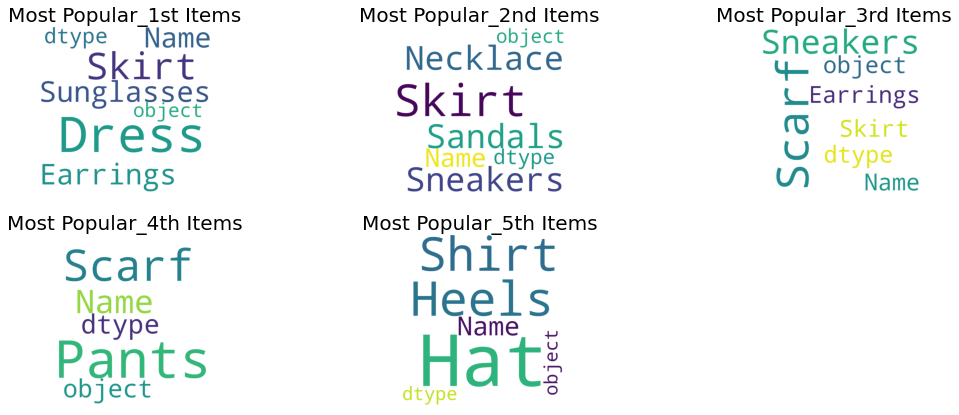

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (18, 7)

# 1st Item

plt.subplot2grid ((2,3),(0,0))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_1st Items',fontsize = 20)

# 2nd Item

plt.subplot2grid ((2,3),(0,1))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[1]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_2nd Items',fontsize = 20)

# 3rd Item

plt.subplot2grid ((2,3),(0,2))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[2]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_3rd Items',fontsize = 20)

# 4th Item

plt.subplot2grid ((2,3),(1,0))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[3]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_4th Items',fontsize = 20)

# 5th Item

plt.subplot2grid ((2,3),(1,1))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[4]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_5th Items',fontsize = 20)

plt.show()

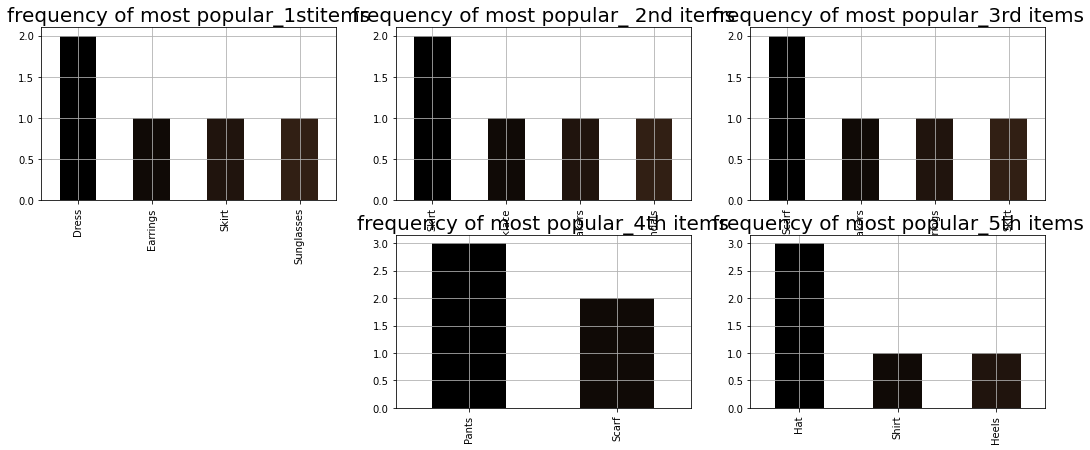

In [123]:
plt.rcParams['figure.figsize'] = (18, 7)

# 1st Item

plt.subplot2grid ((2,3),(0,0))
color = plt.cm.copper(np.linspace(0, 1, 20))
data[0].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_1stitems', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

# 2nd Item

plt.subplot2grid ((2,3),(0,1))
color = plt.cm.copper(np.linspace(0, 1, 20))
data[1].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_ 2nd items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

# 3rd Item

plt.subplot2grid ((2,3),(0,2))
color = plt.cm.copper(np.linspace(0, 1, 20))
data[2].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_3rd items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

# 4th Item

plt.subplot2grid ((2,3),(1,1))
color = plt.cm.copper(np.linspace(0, 1, 20))
data[3].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_4th items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

plt.subplot2grid ((2,3),(1,2))
color = plt.cm.copper(np.linspace(0, 1, 20))
data[4].value_counts().plot.bar(color = color)
plt.title('frequency of most popular_5th items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()


plt.show()

## 1- Apriori Preparation

In [71]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    
df=pd.DataFrame(te_ary, columns=te.columns_)  
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


## 2- Support with column names

In [64]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


## Interpretation :

(Hat) have 3/5 transaction = 0.6
(Pants) have 4/5 transaction = 0.8
(Scarf) have 4/5 transaction = 0.8
(Scarf, Pants) have 3/5 transaction = 0.6
(Skirt, Pants have 3/5 transaction = 0.6

## 3- Confidence 

In [128]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


## Interpretation

Antecedents (Scarf) - consequents (Pants) : After buying the Scarf, the probability of buying Pants is 75%.

Antecedents (Pants) - consequents (Scarf) : After buying the Pants, the probability of buying Scarf is 75%.

Antecedents (Skirt) - consequents (Pants) : After buying the Skirt, the probability of buying Pants is 100%.

Antecedents (Pants) - consequents (Skirt) : After buying the Pants, the probability of buying Skirt is 75%.

## 4- Lift 

In [127]:
from mlxtend.frequent_patterns import association_rules 
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# Conclusion

The skirt and the pants have a confidence = 1 & lift = 1.25 which mean they can be put together.

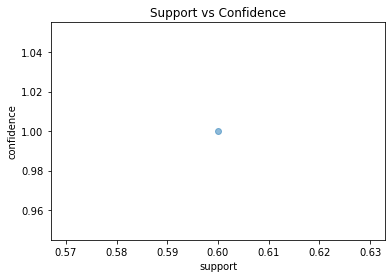

In [67]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

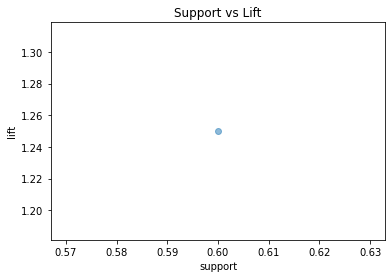

In [68]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


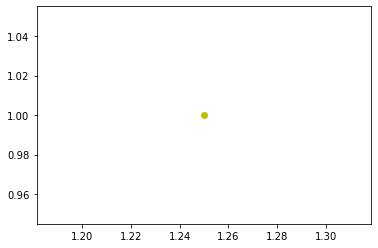

In [69]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# Association Rules_Part2

# Market Basket Optimisation Association Rules

In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

#import os
#print(os.listdir('../input/'))

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [138]:
data=pd.read_csv('Market_Basket_Optimisation.csv',header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
data.shape

(7501, 20)

In [140]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [141]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2326,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3601,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2612,turkey,spaghetti,barbecue sauce,french fries,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6225,frozen smoothie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4906,shrimp,ground beef,spaghetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2327,turkey,honey,cooking oil,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,chocolate,butter,eggs,green tea,cottage cheese,mayonnaise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3754,turkey,shrimp,whole wheat pasta,mineral water,milk,pancakes,bug spray,brownies,body spray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4854,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,turkey,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualizations

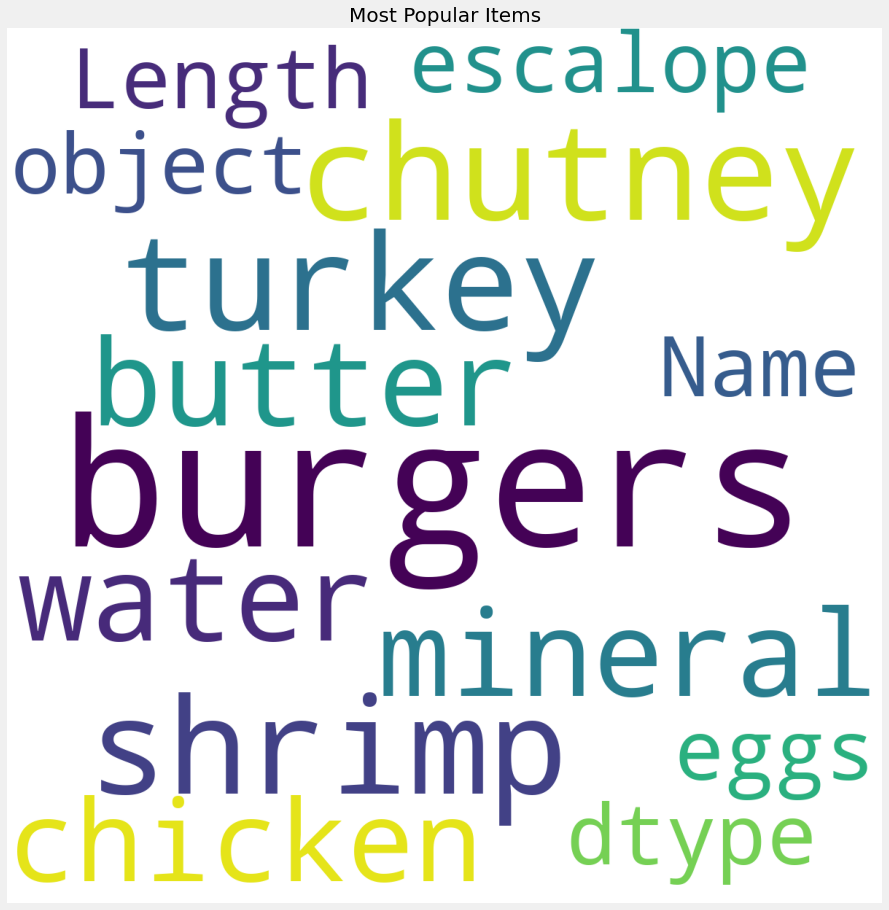

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

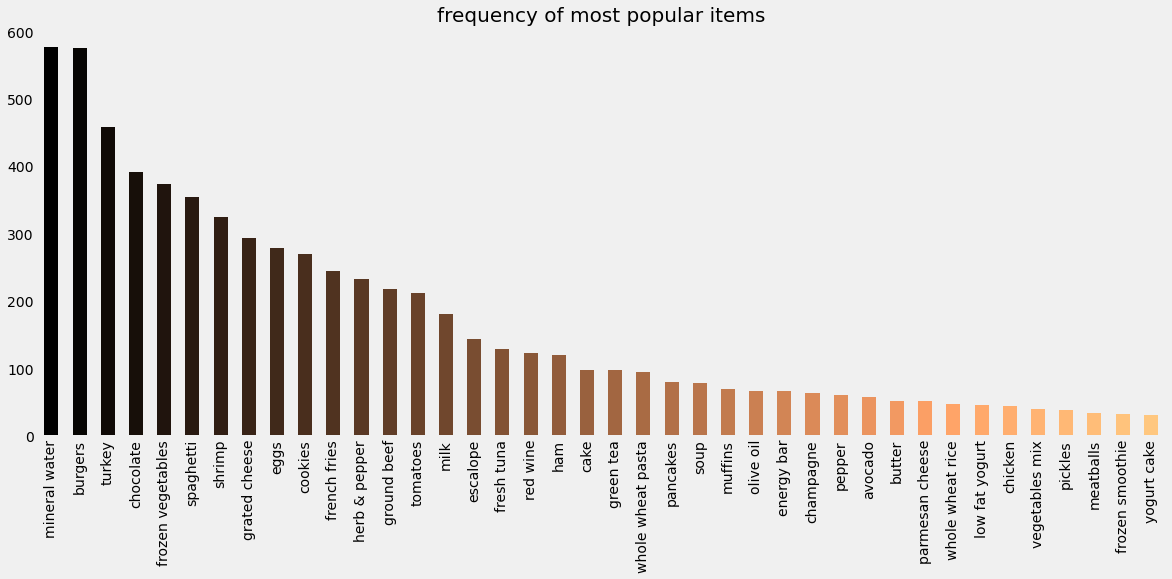

In [144]:
# looking at the frequency of most popular items

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [145]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'olive oil',
       'energy bar', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'hot dogs', 'dessert wine', 'honey',
       'candy bars', 'cereals', 'yams', 'oil', 'strawberries', 'tomato sauce'],
      dtype='object')

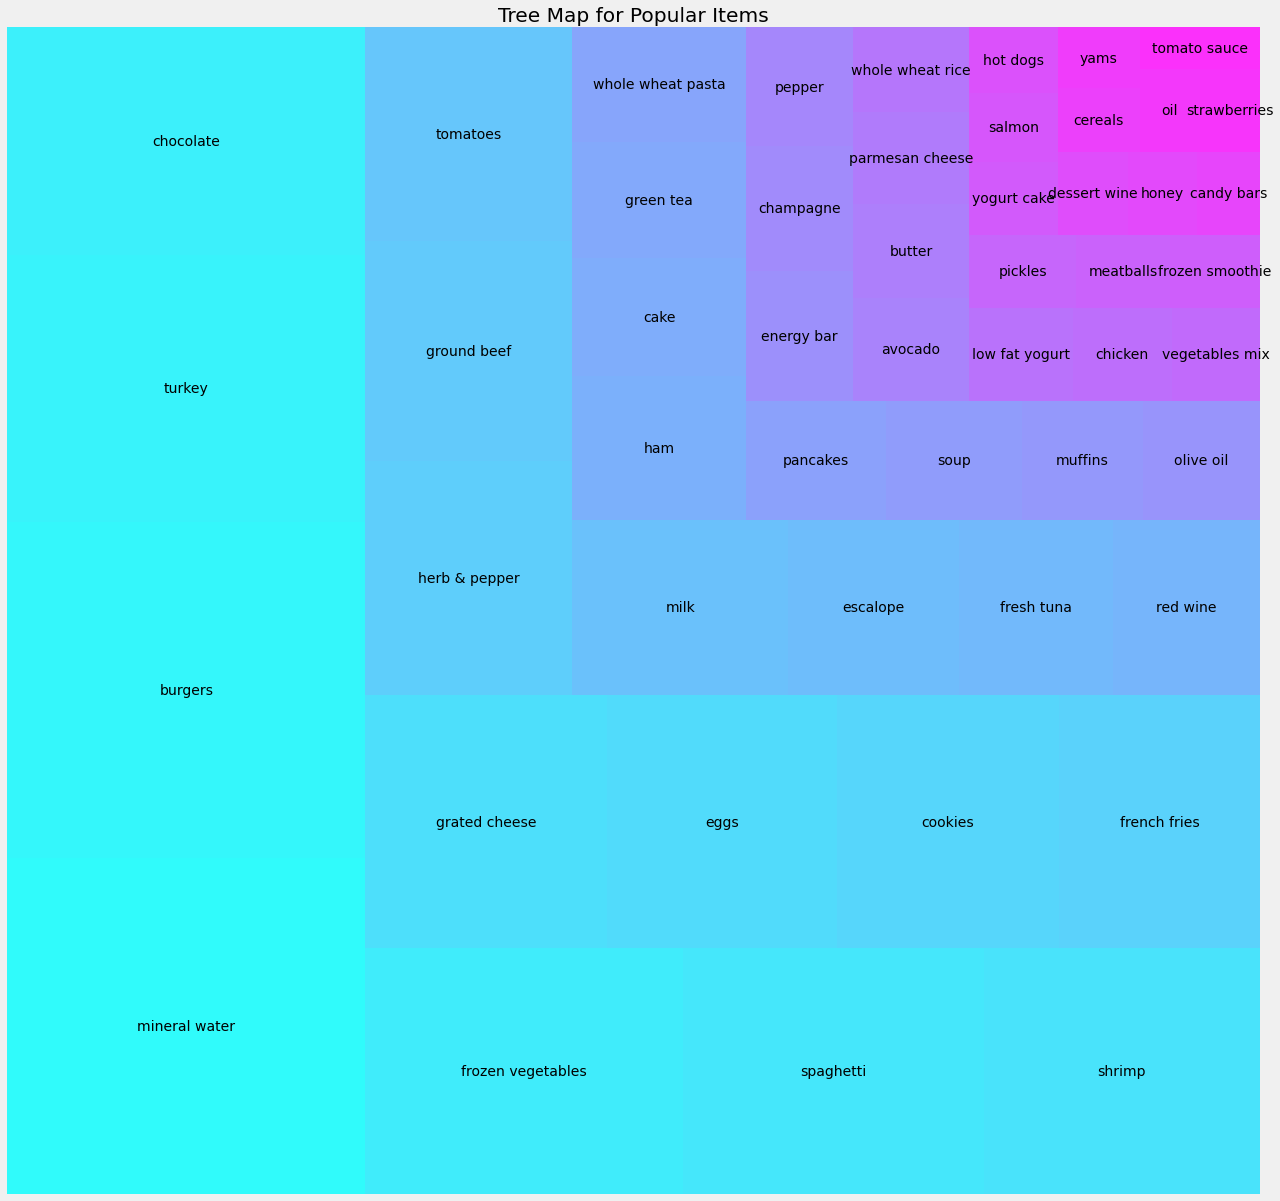

In [146]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [147]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

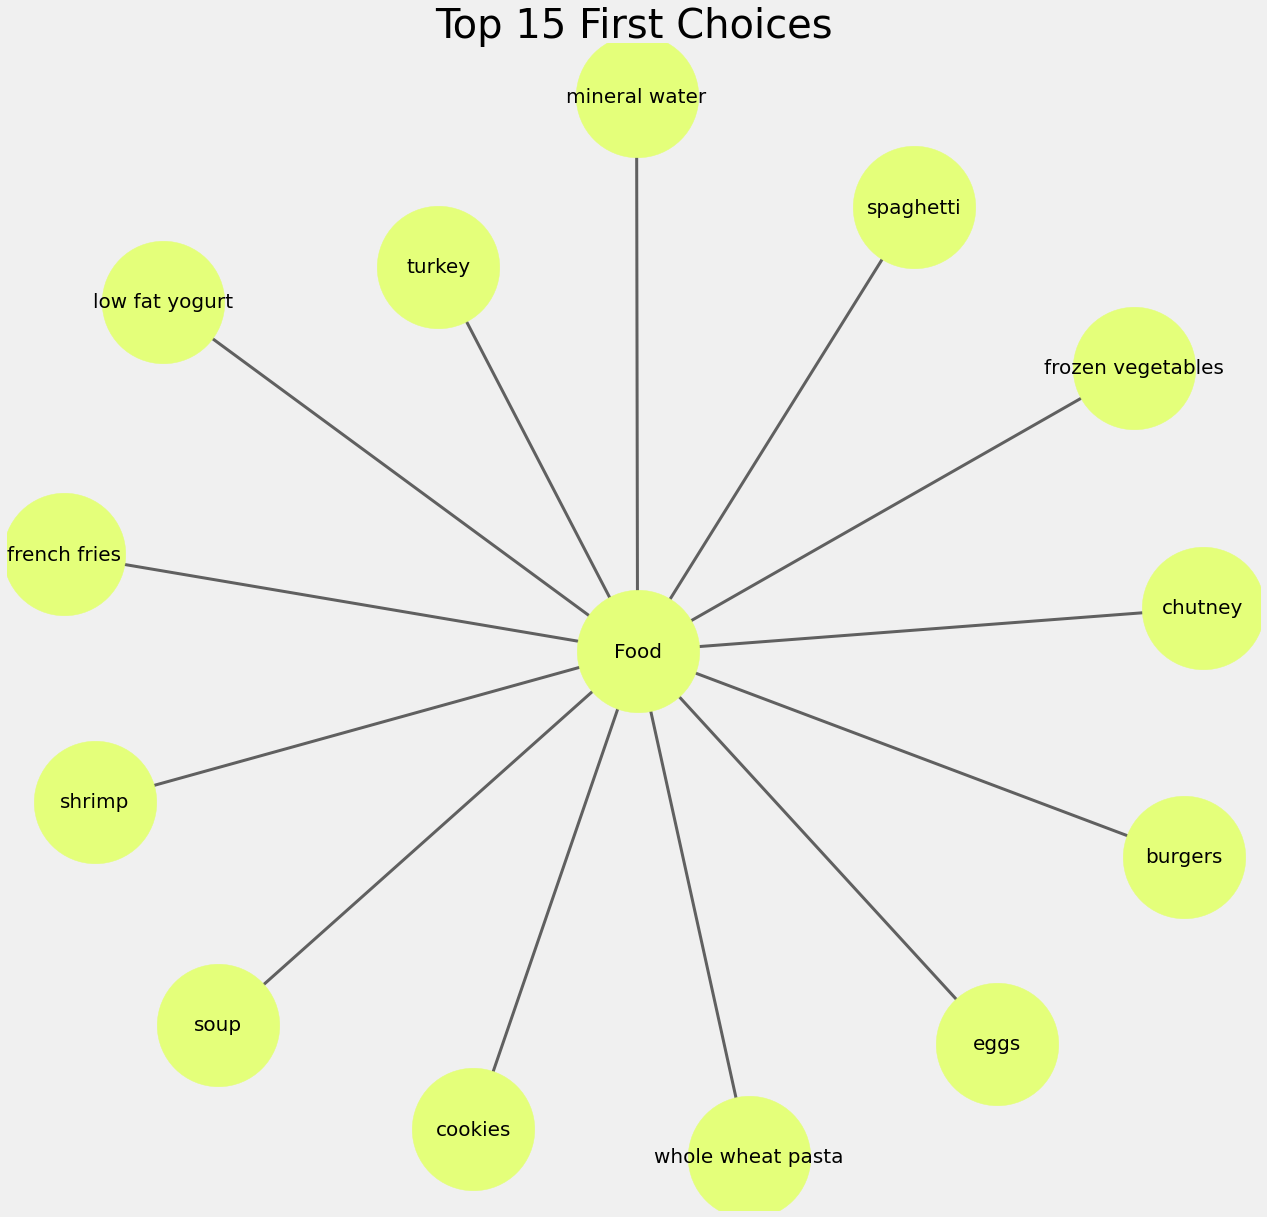

In [148]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [149]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

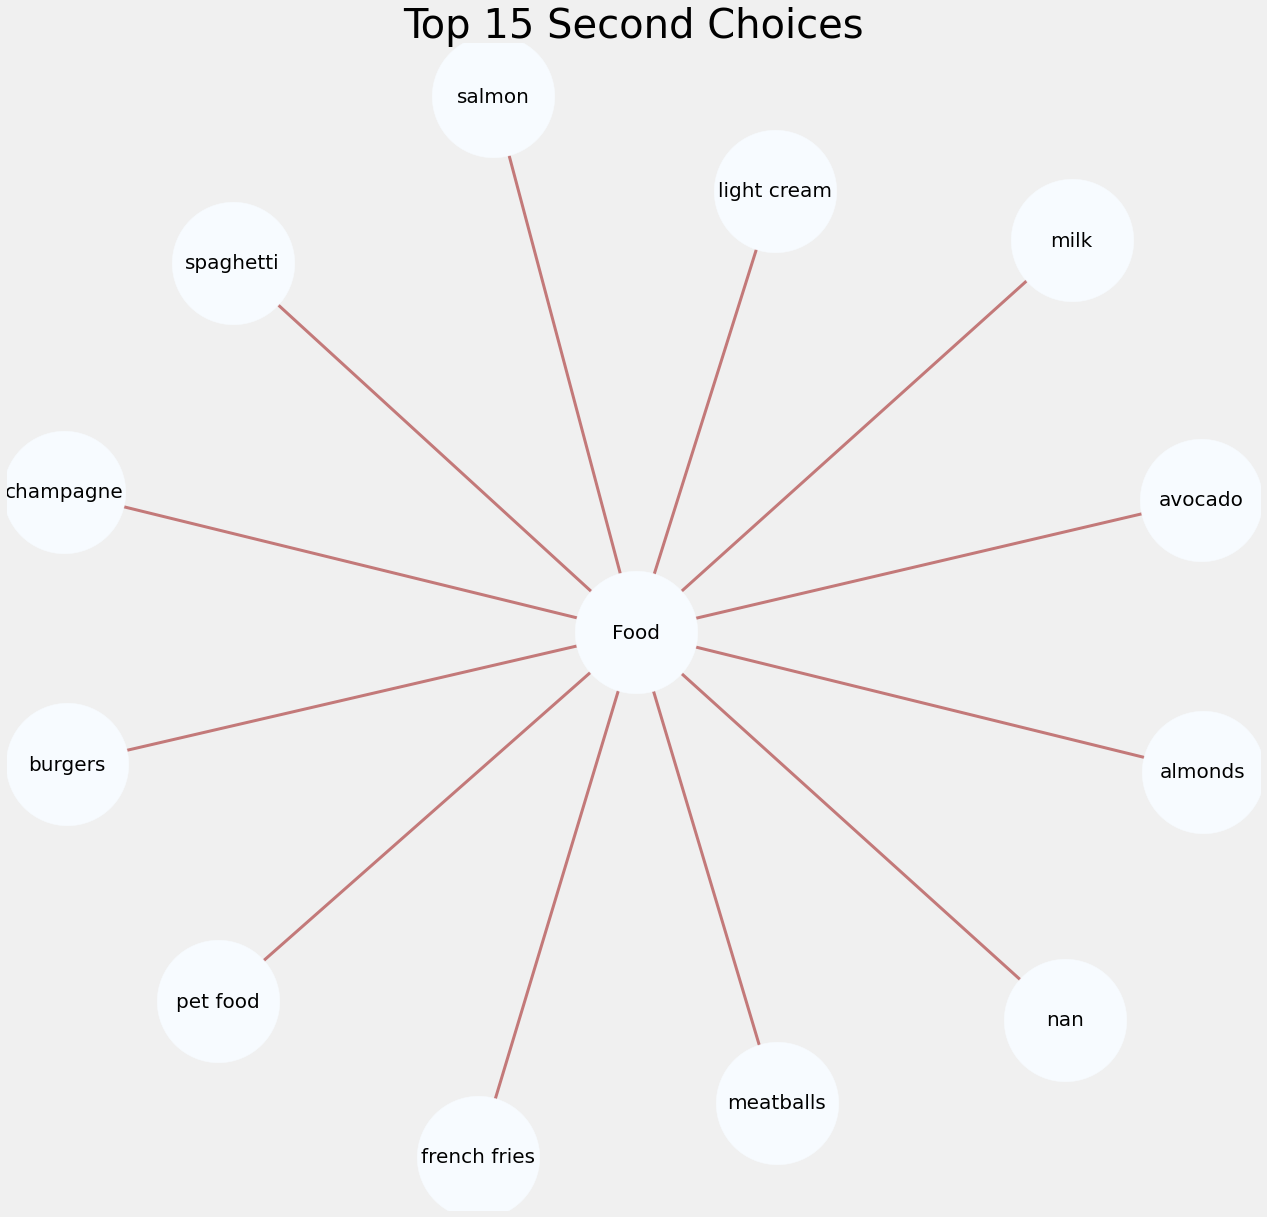

In [150]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

# Data Preprocessing

In [151]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


# Association Rules

In [152]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(7501, 121)

In [154]:
# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'olive oil',
       'energy bar', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake']]

data.shape

(7501, 40)

In [155]:
data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'olive oil',
       'energy bar', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [156]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## 2- Support with column names

In [157]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(mineral water, eggs, ground beef)"
205,0.013065,"(mineral water, eggs, milk)"
206,0.011065,"(mineral water, milk, ground beef)"
207,0.010532,"(spaghetti, chocolate, eggs)"


## 3- Confidence 

In [158]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


# Lift

In [159]:
from mlxtend.frequent_patterns import association_rules 
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# Conclusion 

The spaghetti and the mineral water have a confidence = 1 & lift = 1.43 which mean they can be put together.
also The chocolate and the mineral water can be put together 